<a href="https://colab.research.google.com/github/fmbento/Jupyter-Notebooks_ad-hoc-solutions/blob/main/WS_AnaliseVisualizacaoDeDados_Genero_Altura_Peso_importacao_do_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### **IMPORTANTE**
> Apesar de ir ver muito código neste Notebook (Python), para este workshop **não precisa de ter qualquer conhecimento de programação** (a IA dará uma preciosa ajuda).



# Visualizações básicas a partir de dados da Altura, Peso e Género
### Ficheiro de dados obtido automaticamente do Kaggle, dataset [Gender-Height-Weight.csv](https://www.kaggle.com/datasets/sonalisingh1411/genderheightweightcsv)

**Adaptado** de https://colab.research.google.com/drive/1MdbnCQs13g6h4SFqQfWzgmeoRMnMGOtH?usp=sharing


**Basiado** em:
*   https://machinelearningmastery.com/quick-and-dirty-data-analysis-with-pandas/
*   https://pylenin.hashnode.dev/data-analytics-with-matplotlib
*   https://medium.com/@ayushmandurgapal/data-visualization-using-python-1f0b032ff2db

# Obter os dados:

In [ ]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("sonalisingh1411/genderheightweightcsv")

print("Path to dataset files:", path)

# Get the list of files in the directory
files = os.listdir(path)

# Assuming the CSV file is the first file in the list
csv_file_name = files[0]

# Create the full path to the CSV file
csv_file_path = os.path.join(path, csv_file_name)

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(csv_file_path)

Using Colab cache for faster access to the 'genderheightweightcsv' dataset.
Path to dataset files: /kaggle/input/genderheightweightcsv


In [ ]:
# Alguns registos (5 primeiros e últimos)
print( data )

      Gender      Height      Weight
0          1  187.571423  109.720985
1          1  174.706036   73.622732
2          1  188.239668   96.497550
3          1  182.196685   99.809504
4          1  177.499761   93.598619
...      ...         ...         ...
9995       0  168.078536   62.041159
9996       0  170.350573   77.504315
9997       0  162.224700   58.275377
9998       0  175.346978   74.322166
9999       0  157.338385   51.550324

[10000 rows x 3 columns]


# Pré-processa os dados

In [ ]:
# Os dados parecem estar em unidades norte-americanas (dos EUA), ou seja, polegadas e libras.

# Converter altura de polegadas para centímetros
data['Height'] = data['Height'] * 2.54

# Converter peso de libras para quilogramas
data['Weight'] = data['Weight'] * 0.453592

# Já agora, vamos também alterar a categoria de texto para número.
# Mapear Género para valores numéricos (0 para Feminino, 1 para Masculino)
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})

In [ ]:
# Novamente, algumas linhas de exemplo. Agora os dados parecem estar nas unidades corretas (cm/kg)
print( data )

      Gender      Height      Weight
0          1  187.571423  109.720985
1          1  174.706036   73.622732
2          1  188.239668   96.497550
3          1  182.196685   99.809504
4          1  177.499761   93.598619
...      ...         ...         ...
9995       0  168.078536   62.041159
9996       0  170.350573   77.504315
9997       0  162.224700   58.275377
9998       0  175.346978   74.322166
9999       0  157.338385   51.550324

[10000 rows x 3 columns]


# Descrição dos dados

In [ ]:
# Obtenha informações sobre a estrutura
data.info()

# Contagem Não Nula: O número de valores não nulos (não ausentes) em cada coluna.
# Dtype: O tipo de dados dos valores da coluna. "int64" representa números inteiros de 64 bits. "float64" representa números de ponto flutuante de 64 bits. "object" tipicamente representa texto ou dados categóricos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  int64  
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


In [ ]:
# Obter informações sobre as estatísticas
print( data.describe() )

             Gender        Height        Weight
count  10000.000000  10000.000000  10000.000000
mean       0.500000    168.573602     73.228054
std        0.500025      9.772721     14.564131
min        0.000000    137.828359     29.347460
25%        0.000000    161.304276     61.605982
50%        0.500000    168.447898     73.124894
75%        1.000000    175.702625     84.898599
max        1.000000    200.656806    122.465167


# Começamos com uma visualização simples

Distribuição de características: A primeira e mais fácil propriedade a rever é a distribuição de cada atributo. Isto permite observar propriedades interessantes das distribuições de atributos, como a possível distribuição normal dos atributos.

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>, <Axes: >]], dtype=object)

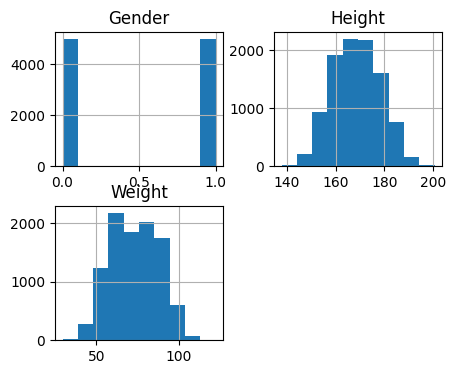

In [ ]:
# Mostrar histograma
data.hist(figsize=(5,4))

A próxima relação importante a explorar é a de cada atributo com o atributo de classe.
Uma abordagem consiste em visualizar a distribuição dos atributos para instâncias de dados para cada classe e observar as diferenças. É possível gerar uma matriz de histogramas para cada atributo e uma matriz de histogramas para cada valor de classe. Os dados são agrupados pelo atributo de classe (dois grupos) e, em seguida, é criada uma matriz de histogramas para os atributos em cada grupo. O resultado são duas imagens.

,0
Gender,
0,"[[Axes(0.125,0.545217;0.336957x0.334783), Axes..."
1,"[[Axes(0.125,0.545217;0.336957x0.334783), Axes..."


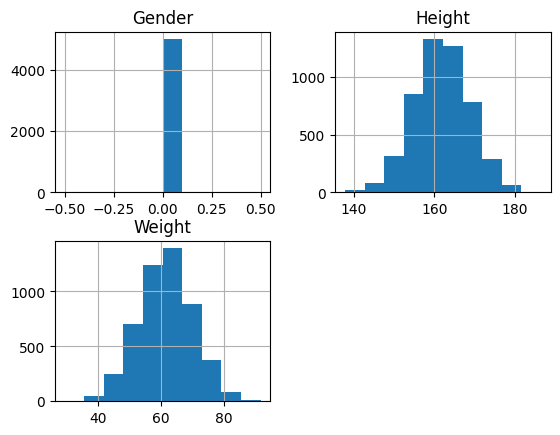

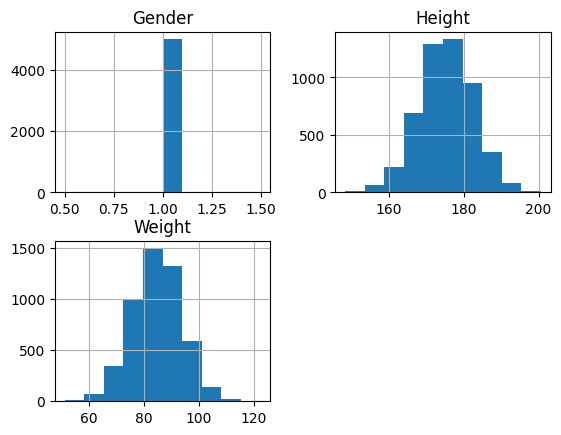

In [ ]:
data.groupby('Gender').hist()


É possível contrastar melhor os valores dos atributos para cada classe no mesmo gráfico. Isso agrupa os dados por classe, plotando apenas o histograma de plas que mostra o valor da classe 0 em vermelho e o valor da classe 1 em azul. É possível ver uma distribuição normal com formato semelhante, mas com uma mudança. Esse atributo provavelmente será útil para discriminar as classes.

,Height
Gender,
0,"Axes(0.125,0.11;0.775x0.77)"
1,"Axes(0.125,0.11;0.775x0.77)"


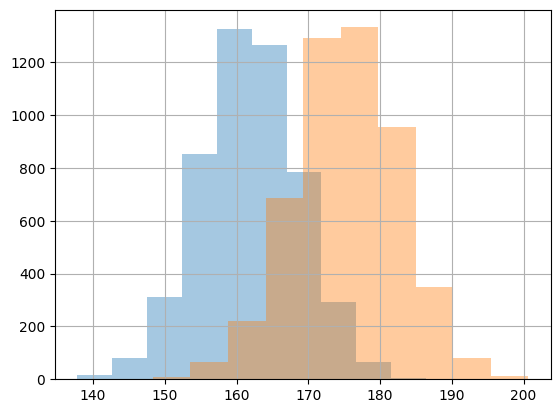

In [ ]:
data.groupby('Gender').Height.hist(alpha=0.4)

Outra forma de mostrar essas informações é usar um gráfico de violino. No entanto, o gráfico de violino fornece uma visualização mais detalhada da distribuição de um atributo (aqui: alturas) para cada classe (aqui: género). Ao contrário do histograma, que mostra a frequência dos valores, o gráfico de violino exibe tanto a densidade de probabilidade dos dados quanto as principais estatísticas resumidas, como a média e a mediana. A média é marcada com um ponto, enquanto a mediana é marcada com uma linha, proporcionando uma comparação rápida das tendências centrais.

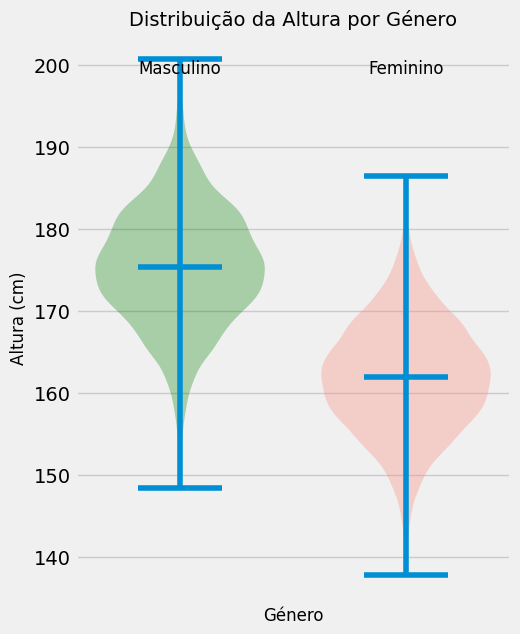

In [ ]:
import matplotlib.pyplot as plt

# Assumindo que o DataFrame `data` contém as colunas relevantes
colors = ['green', 'salmon']

# Cria a figura
plt.figure(figsize=(5, 7))

# Gráfico de violino para altura com base no género
violin_parts = plt.violinplot(
    [data[data['Gender'] == 1]['Height'],  # Masculino
     data[data['Gender'] == 0]['Height']],  # Feminino
    showmeans=False,
    showmedians=True,
    widths=0.3,
    positions=[1, 1.4],
    vert=True,
    showextrema=True
)

# Define as cores para os violinos
for pc, color in zip(violin_parts['bodies'], colors):
    pc.set_facecolor(color)

# Adiciona rótulos e texto
labels = ["Masculino", "Feminino"]
plt.text(1, max(data['Height']), "Masculino", ha='center', va="top", fontsize=12)
plt.text(1.4, max(data['Height']), "Feminino", ha='center', va="top", fontsize=12)

# Personaliza os eixos e o título
plt.xlabel('Género', size=12)
plt.ylabel('Altura (cm)', size=12)
plt.title('Distribuição da Altura por Género', size=14)
plt.xticks([])  # Remova as marcas padrão do eixo x
plt.grid(True)

# Mostra o gráfico
plt.show()

Também podemos fazer isso com outra biblioteca com um pouco menos de código...


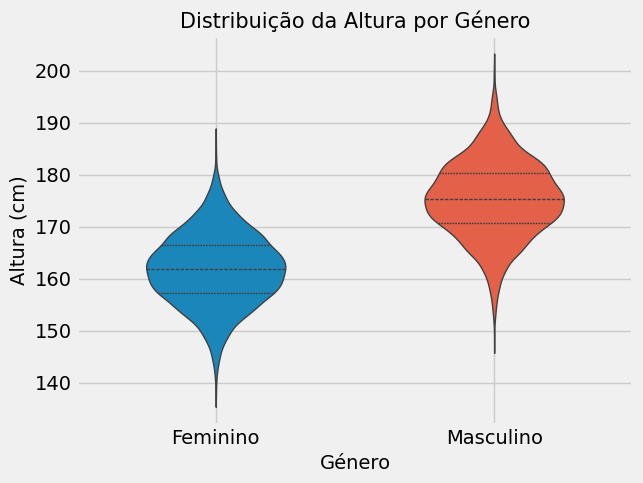

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de violino Seaborn corrigido
sns.violinplot(
    data=data,
    x="Gender", y="Height", hue="Gender",
    legend=False, linewidth=1, width=0.5,
    inner="quartile"
)

# Personalize os rótulos e o título
plt.xlabel('Género', size=14)
plt.ylabel('Altura (cm)', size=14)
plt.title('Distribuição da Altura por Género', size=15)
plt.xticks([0, 1], ['Feminino', 'Masculino'])  # Mapear Género numérico para rótulos categóricos
plt.grid(True)

# Mostre o gráfico
plt.show()

Relações entre características: A última relação importante a explorar é a relação entre os atributos.

Podemos analisar as relações entre os atributos observando a distribuição das interações de cada par de atributos. Isso usa uma função integrada para criar uma matriz de gráficos de dispersão de todos os atributos em relação a todos os atributos. A diagonal onde cada atributo seria plotado em relação a si mesmo mostra, em vez disso, a Estimativa de Densidade do Kernel do atributo.

array([[<Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='Weight', ylabel='Height'>],
       [<Axes: xlabel='Height', ylabel='Weight'>,
        <Axes: xlabel='Weight', ylabel='Weight'>]], dtype=object)

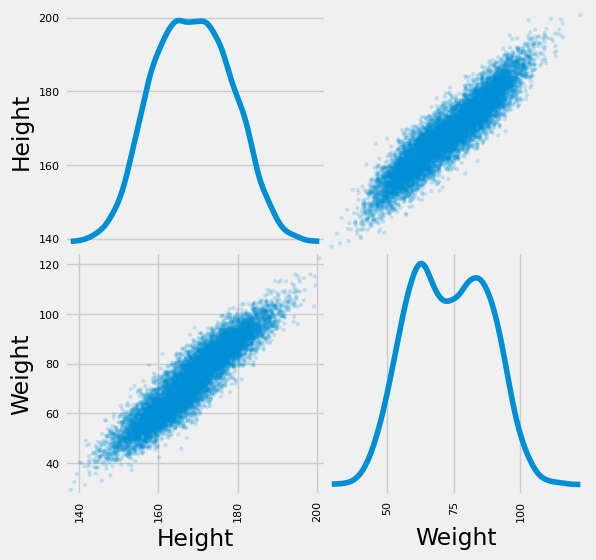

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['Height', 'Weight']], alpha=0.2, figsize=(6, 6), diagonal='kde')

We can also intrgrate this into one plot...

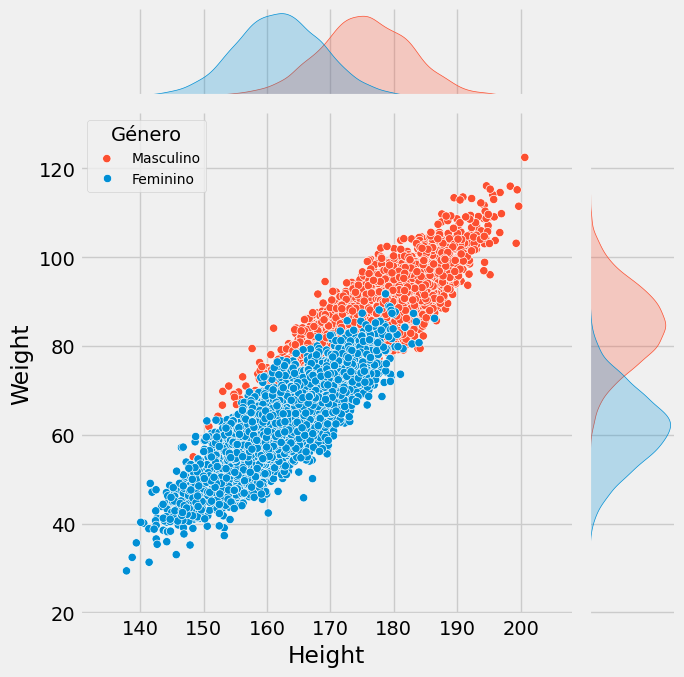

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cria um gráfico de junta para Altura e Peso
g = sns.jointplot(
    data=data,
    x="Height", y="Weight", hue="Gender",
    height=7, marker="o"
)

# Eixo principal do gráfico de junta
ax = g.ax_joint

# Desloca a legenda para um local específico
ax.legend(title="Género", loc="upper left", fontsize=10, labels=["Masculino", "Feminino"])

# Mostre o gráfico
plt.show()

# Mais Exemplos...

In [ ]:
Data = {'Year': [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010, 2020],
        'Unemployment_Rate': [9.8,12,8,7.2,6.9,7,6.5,6.2,5.5,6.3, 7.9]
       }

df = pd.DataFrame(Data, columns = ['Year', 'Unemployment_Rate'])

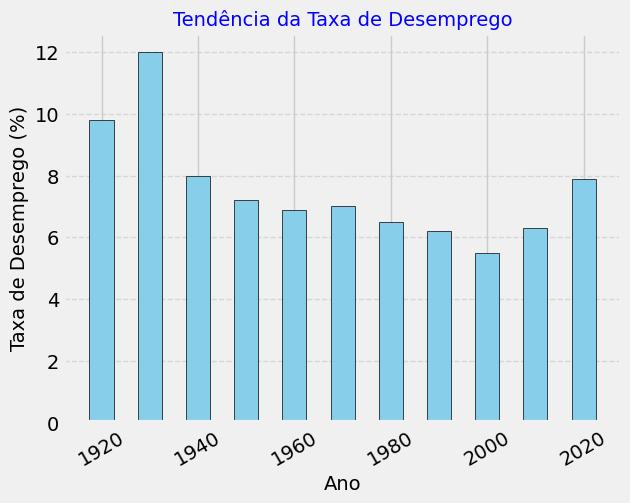

In [ ]:
# Gráfico de barras
plt.bar(df.Year, df.Unemployment_Rate, color='skyblue', edgecolor='black', width=5)

# Adicionar título e rótulos
plt.title('Tendência da Taxa de Desemprego', color='Blue', size=14)
plt.xlabel('Ano', size=14)
plt.ylabel('Taxa de Desemprego (%)', size=14)

# Personalizar o estilo do gráfico
plt.style.use('fivethirtyeight')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adicionar linhas de grade horizontais
plt.xticks(rotation=30)  # Rodar os rótulos do eixo x

# Mostrar o gráfico
plt.show()

Gráfico de linha

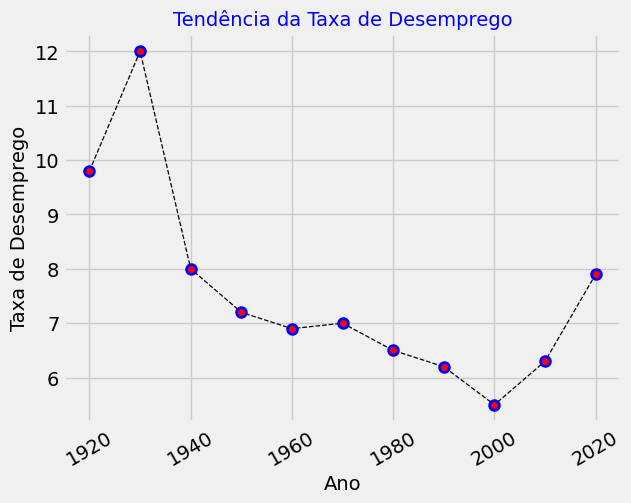

In [ ]:
plt.plot(df.Year, df.Unemployment_Rate, marker = 'o', color = 'black',
         linewidth = 0.9, linestyle = '--',
         markeredgecolor = 'blue',
         markeredgewidth = '2.0',
         markerfacecolor = 'red', markersize = 7.0)
plt.title('Tendência da Taxa de Desemprego', color = 'Blue', size = 14)
plt.xlabel('Ano', size = 14)
plt.ylabel('Taxa de Desemprego', size = 14)
plt.style.use('fivethirtyeight')
plt.grid(True)
plt.xticks(rotation = 30)
plt.show()

Gráfico de área

Text(0.5, 1.0, 'Tendência da Taxa de Desemprego')

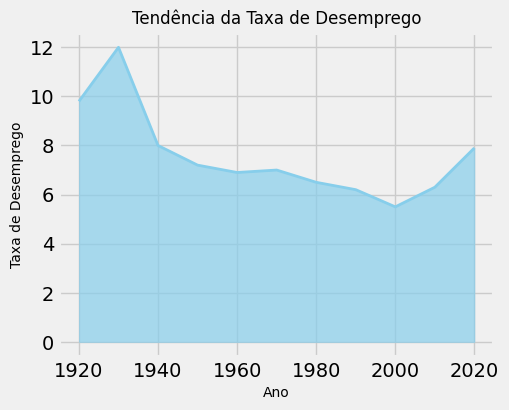

In [ ]:
fig = plt.figure(figsize = (5,4))
plt.fill_between(df['Year'], df['Unemployment_Rate'], color='skyblue',
alpha=0.7)
plt.plot(df['Year'], df['Unemployment_Rate'], color='skyblue', linewidth = 2)
plt.xlabel("Ano", size = 10)
plt.ylabel("Taxa de Desemprego", size = 10)
plt.title("Tendência da Taxa de Desemprego", size = 12)

Gráfico circular

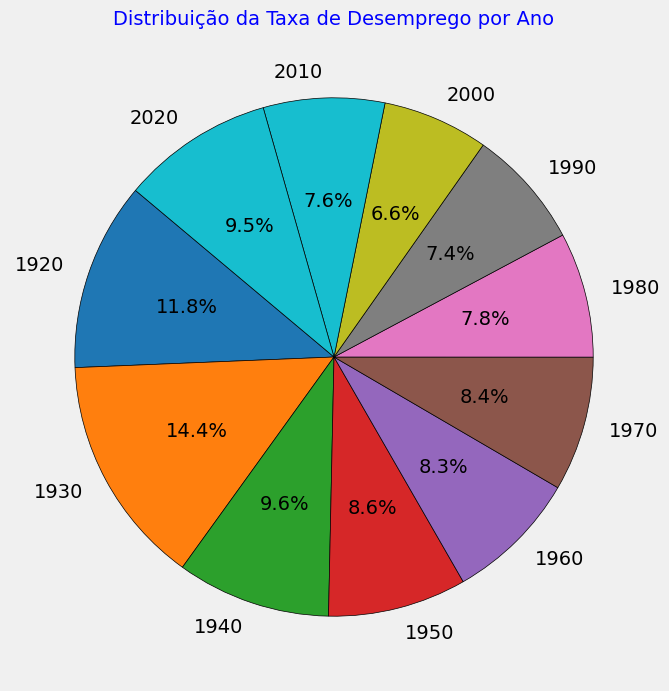

In [ ]:
# Criar gráfico de pizza
plt.figure(figsize=(8, 8))
colors = plt.cm.tab10(range(len(df)))  # Usar um mapa de cores para consistência
plt.pie(
    df['Unemployment_Rate'],
    labels=df['Year'],
    autopct='%1.1f%%',  # Adiciona exibição de porcentagem
    startangle=140,     # Roda o gráfico de pizza para melhor legibilidade
    colors=colors,
    wedgeprops={'edgecolor': 'black'}  # Adiciona bordas pretas às fatias
)

# Adiciona Título
plt.title('Distribuição da Taxa de Desemprego por Ano', color='Blue', size=14)

# Mostra o gráfico
plt.show()

Ou algo completamente diferente... Word Cloud



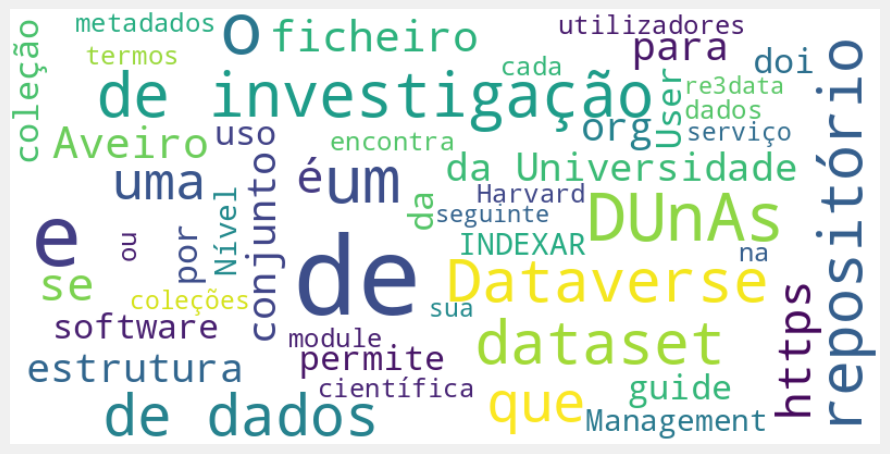

In [ ]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Specify the URL of the website
url = "https://uapt.libguides.com/dunas/sobre"

# Fetch the HTML content of the website
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract text content from the HTML
# This grabs all the text content from the <p> tags (you can customize this if needed)
text_content = " ".join([p.text for p in soup.find_all('p')])

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_font_size=100,
    max_words=50,
    margin=5,
    prefer_horizontal=0.7
)
wordcloud.generate(text_content)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Ou 3d?

In [ ]:
import requests
import os

# Define a URL do ficheiro PLY
ply_file_url = "https://github.com/MatPixel/dataset-for-3d-pointcloud-processing-3d-deep-learning/raw/main/mug-only-vertices.ply"
# ply_file_url = "https://github.com/MatPixel/dataset-for-3d-pointcloud-processing-3d-deep-learning/raw/main/bunny-pcd.ply"

# Define o caminho local para guardar o ficheiro PLY descarregado
ply_file_path_local = "mug-only-vertices.ply"

# Descarrega o ficheiro PLY da URL
response = requests.get(ply_file_url, stream=True)
if response.status_code == 200:
    with open(ply_file_path_local, 'wb') as file:
        for chunk in response.iter_content(chunk_size=8192):
            file.write(chunk)
    print(f"Ficheiro PLY descarregado com sucesso e guardado em {ply_file_path_local}")
else:
    print(f"Falha ao descarregar o ficheiro PLY. Código de estado: {response.status_code}")
    exit()

Ficheiro PLY descarregado com sucesso e guardado em mug-only-vertices.ply


In [ ]:
# !pip install open3d

Detalhes da nuvem de pontos: (1725, 3)


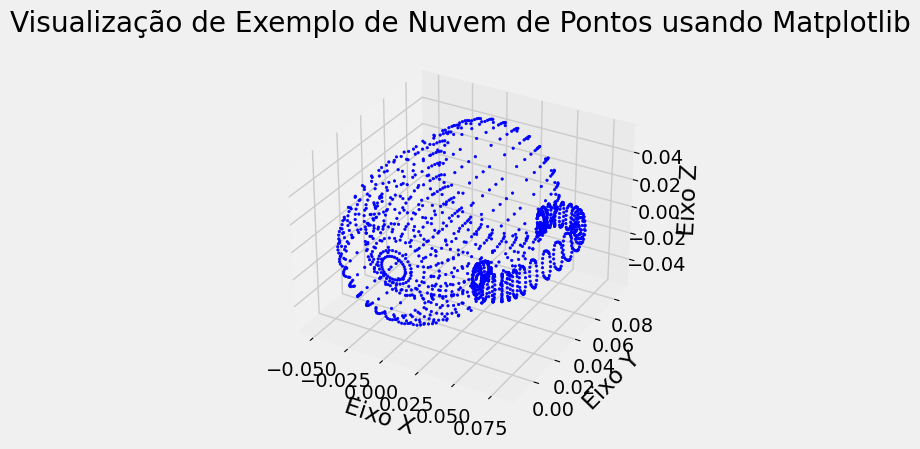

In [ ]:
# Importa bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

# Carrega os dados da nuvem de pontos a partir do ficheiro PLY
pointcloud = o3d.io.read_point_cloud(ply_file_path_local)
pointcloud_array = np.asarray(pointcloud.points)

# Imprime a forma dos dados da nuvem de pontos
print(f"Detalhes da nuvem de pontos: {np.shape(pointcloud_array)}")

# Visualiza a nuvem de pontos usando Matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pointcloud_array[:, 0],
          pointcloud_array[:, 1],
          pointcloud_array[:, 2],
          s=3,
          c='blue',
          alpha=1.0)

ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')
ax.set_zlabel('Eixo Z')
plt.title('Visualização de Exemplo de Nuvem de Pontos usando Matplotlib')
plt.show()

In [ ]:
import plotly.graph_objects as go

# Cria um gráfico de dispersão 3D interativo usando o Plotly
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=pointcloud_array[:, 0],
            y=pointcloud_array[:, 1],
            z=pointcloud_array[:, 2],
            mode='markers',
            marker=dict(
                size=2,
                color='blue',
                opacity=0.8
            )
        )
    ]
)

# Adicionar rótulos e título
fig.update_layout(
    scene=dict(
        xaxis_title='Eixo X',
        yaxis_title='Eixo Y',
        zaxis_title='Eixo Z'
    ),
    title="Visualização interativa de nuvem de pontos 3D"
)

# Show the plot
fig.show()